In [34]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('Customer360InsightsCleaned.csv')
df.head()

,SessionStart,CustomerID,FullName,Gender,Age,CreditScore,MonthlyIncome,Country,State,City,...,OrderConfirmation,OrderConfirmationTime,PaymentMethod,SessionEnd,OrderReturn,ReturnReason,SessionDuration,SessionYear,SessionMonth,SessionDay
0,2019-01-01 02:42:00,1001,Brittany Franklin,1,57,769,7591.0,2,4,Dongguan,...,True,2019-01-01 03:02:00,0,2019-01-01 02:53:00,False,Unknown,11.0,2019,1,1
1,2019-01-02 20:35:00,1002,Scott Stewart,0,69,746,3912.0,2,13,Yantai,...,True,2019-01-02 20:58:00,2,2019-01-02 20:54:00,False,Unknown,19.0,2019,1,2
2,2019-01-04 03:11:00,1003,Elizabeth Fowler,0,21,769,7460.0,7,3,Birmingham,...,True,2019-01-04 03:40:00,0,2019-01-04 03:35:00,False,Unknown,24.0,2019,1,4
3,2019-01-05 09:01:00,1004,Julian Wall,0,67,631,4765.0,7,3,Birmingham,...,True,2019-01-05 09:26:00,0,2019-01-05 09:20:00,False,Unknown,19.0,2019,1,5
4,2019-01-05 13:35:00,1005,James Simmons,1,57,630,3286.8,2,13,Yantai,...,True,2019-01-05 13:52:00,2,2019-01-05 13:42:00,False,Unknown,7.0,2019,1,5


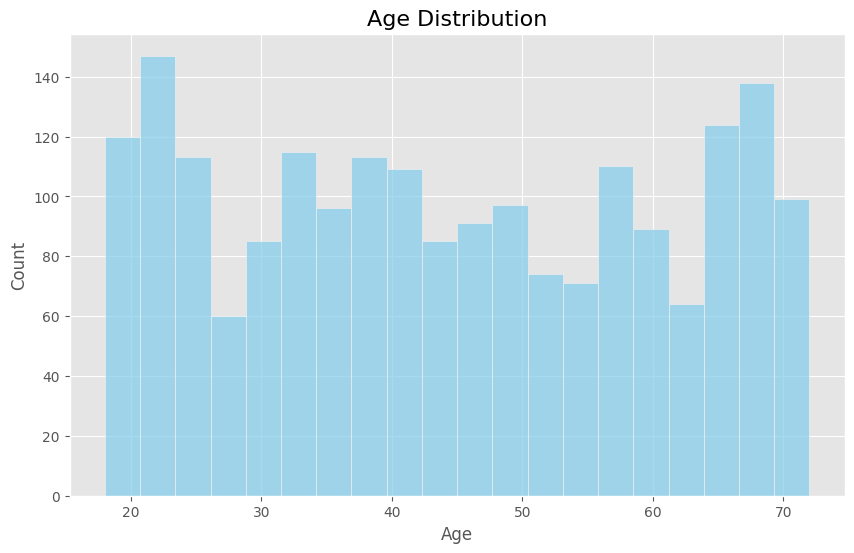

<Axes: xlabel='Age'>

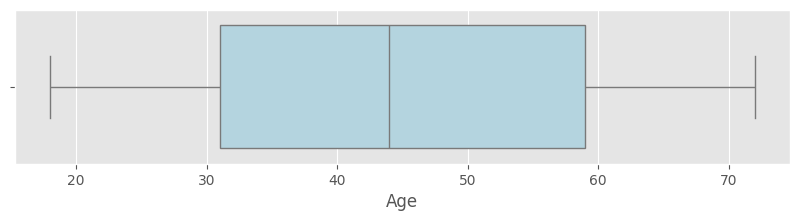

In [36]:
# Age Distribution
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')

sns.histplot(data=df, x='Age', bins=20, kde=False, color='skyblue')


plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x='Age', color='lightblue')

In [37]:
df['Gender'] = df['Gender'].map({0:'Female',1:'Male'})

C:\Users\User Pc\AppData\Local\Temp\ipykernel_9008\961736246.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




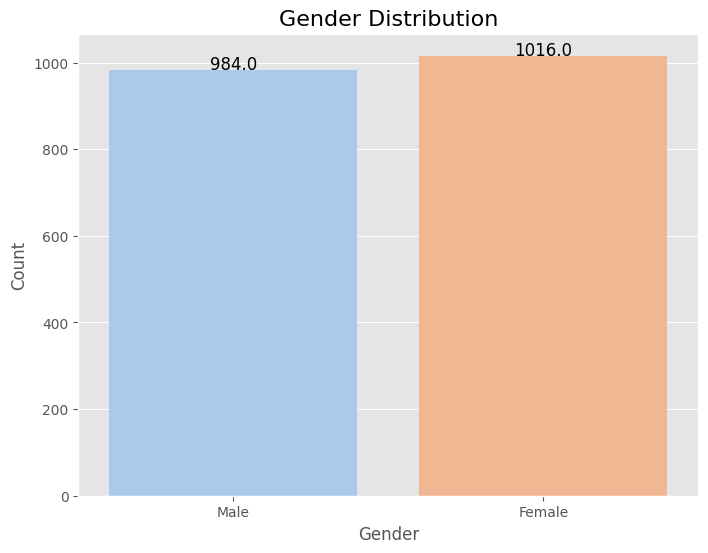

In [39]:
#Gender Distribution
plt.figure(figsize=(8, 6))

# Count plot (bar plot for categorical data)
sns.countplot(data=df, x='Gender', palette='pastel')

# Add title and labels
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count annotations on each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='baseline', fontsize=12, color='black')
plt.show()

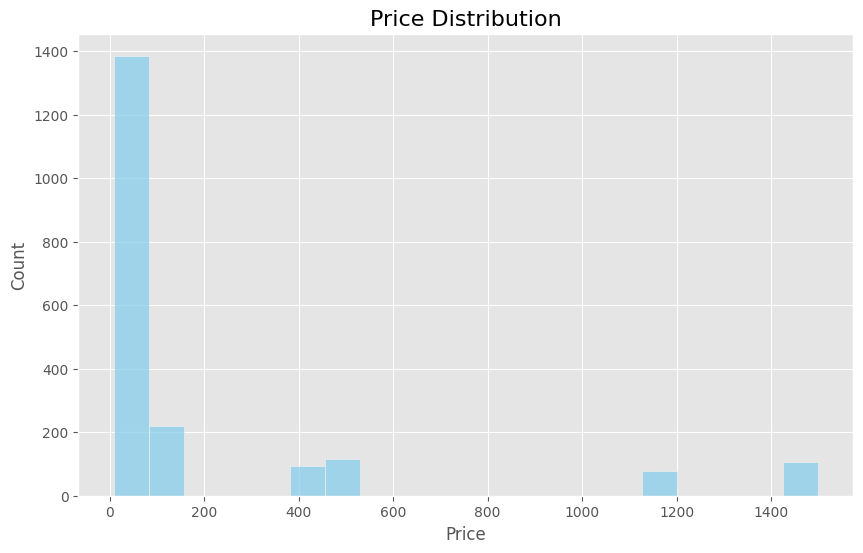

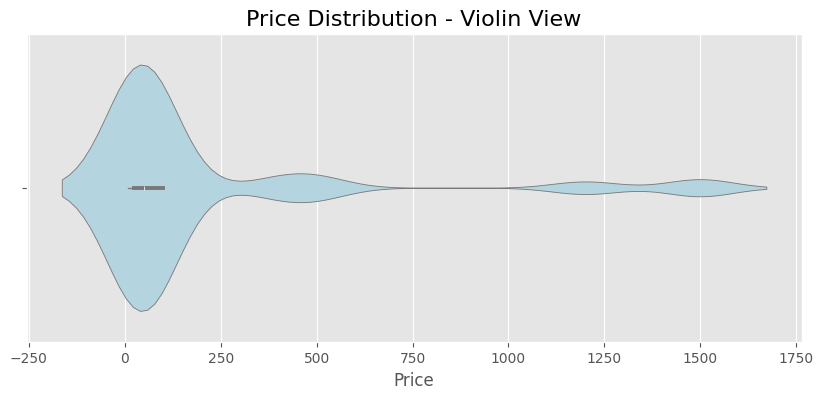

In [40]:
# Price Distribution
# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram
sns.histplot(data=df, x='Price', bins=20, color='skyblue')

# Add title and labels
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

# Create the "marginal=violin" effect
plt.figure(figsize=(10, 4))
sns.violinplot(data=df, x='Price', color='lightblue')

plt.title('Price Distribution - Violin View', fontsize=16)
plt.show()


In [44]:
# Price by Category
df['Category'] = df['Category'].map({1:'electronics', 2:'fashion', 4:'toys', 3:'home appliances', 0:'books'})

C:\Users\User Pc\AppData\Local\Temp\ipykernel_9008\2333562309.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




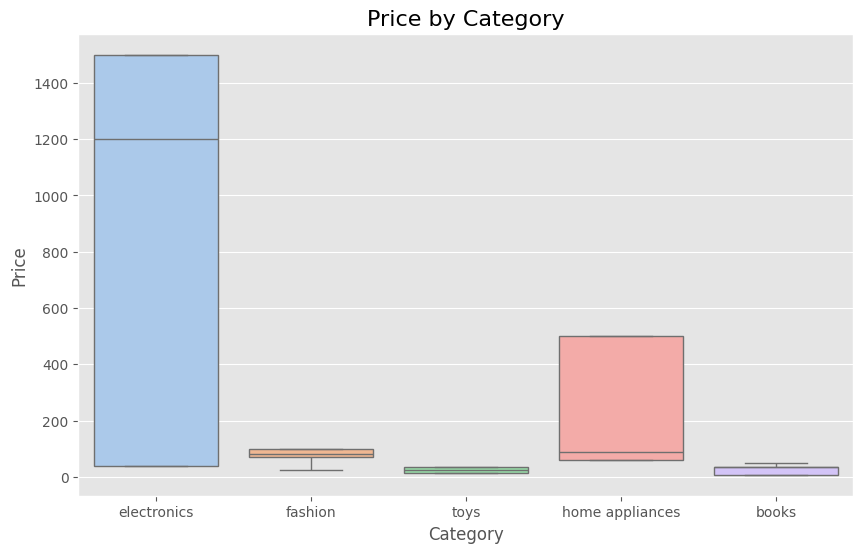

In [45]:

plt.figure(figsize=(10, 6))

# Create a box plot with color by Category
sns.boxplot(data=df, x='Category', y='Price', palette='pastel')

# Add title and axis labels
plt.title('Price by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.show()

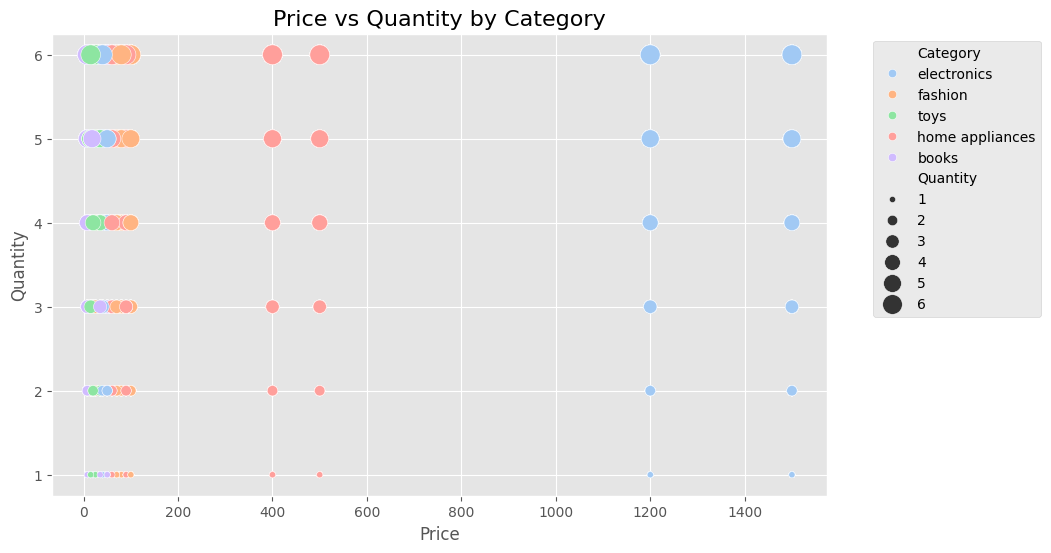

In [46]:
# Price vs Quantity by Category
plt.figure(figsize=(10, 6))

# Create the scatter plot with color by category and size by quantity
scatter_plot = sns.scatterplot(
    data=df,
    x='Price',
    y='Quantity',
    hue='Category',
    size='Quantity',
    sizes=(20, 200),
    palette='pastel',
)

# Add plot title and axis labels
plt.title('Price vs Quantity by Category', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Quantity', fontsize=12)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [13]:
# Correlation Heatmap
corr_matrix = df[['CreditScore', 'MonthlyIncome', 'Price', 'Quantity', 'SessionDuration']].corr()
fig = px.imshow(corr_matrix, text_auto=True, title='Correlation Heatmap')
fig.update_layout(height = 800,width = 1000)
fig.show()


C:\Users\User Pc\AppData\Local\Temp\ipykernel_9008\1277156830.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




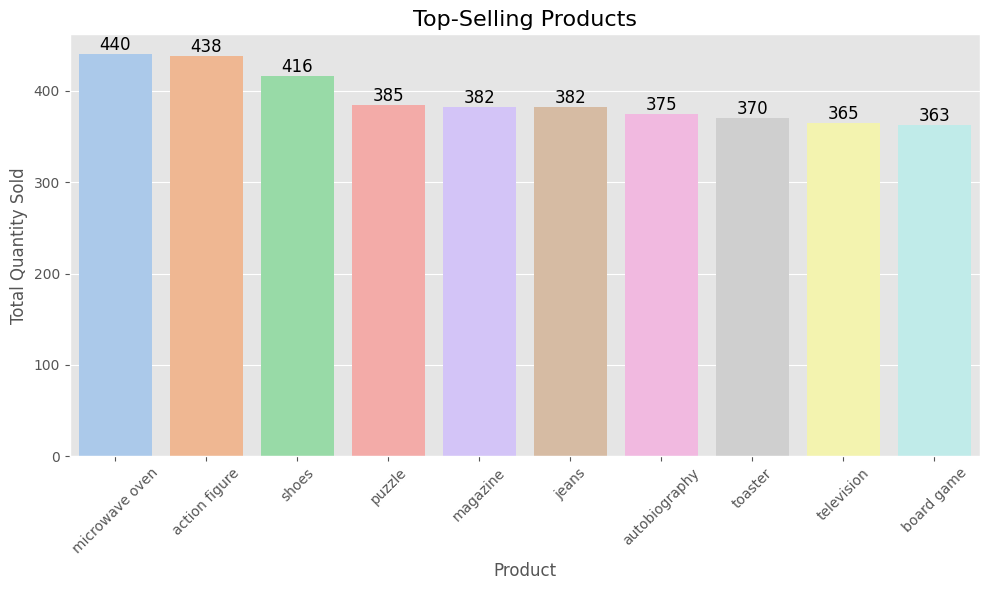

In [47]:
# Top-Selling Products
# Get the top 10 products by quantity sold
top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(
    x=top_products.index,
    y=top_products.values,
    palette='pastel'
)

# Add title and labels
plt.title('Top-Selling Products', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)

# Add value labels on top of bars (mimicking text_auto=True)
for i, value in enumerate(top_products.values):
    plt.text(i, value + 0.1, f'{value}', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


C:\Users\User Pc\AppData\Local\Temp\ipykernel_9008\3987274824.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




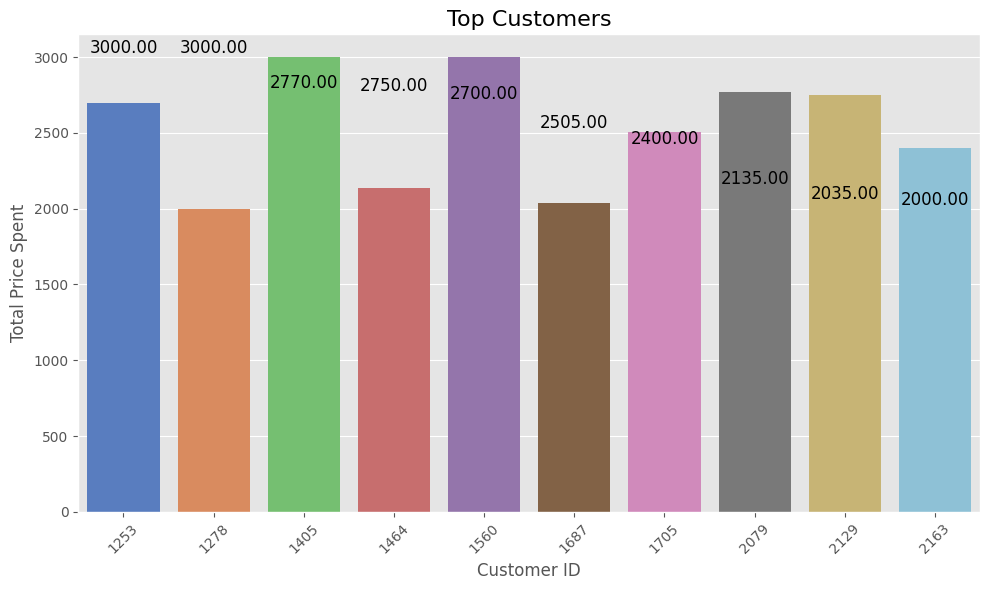

In [48]:
# Customer Segments
# Get the top 10 customers by total price spent
top_customers = df.groupby('CustomerID')['Price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(
    x=top_customers.index,
    y=top_customers.values,
    palette='muted'
)

# Add title and labels
plt.title('Top Customers', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Price Spent', fontsize=12)

# Add value labels on top of each bar (like text_auto=True)
for i, value in enumerate(top_customers.values):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


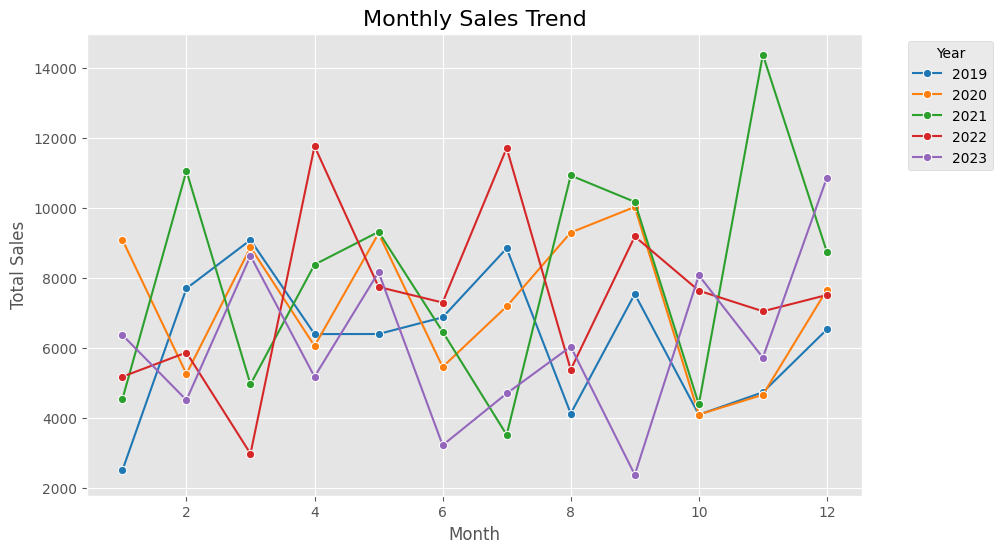

In [49]:
# Seasonal Trends
# Group data by year and month for total sales
monthly_sales = df.groupby(['SessionYear', 'SessionMonth'])['Price'].sum().reset_index()

plt.figure(figsize=(10, 6))

# Create the line plot with markers and color by year
sns.lineplot(
    data=monthly_sales,
    x='SessionMonth',
    y='Price',
    hue='SessionYear',
    marker='o',
    palette='tab10'
)

# Add title and labels
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

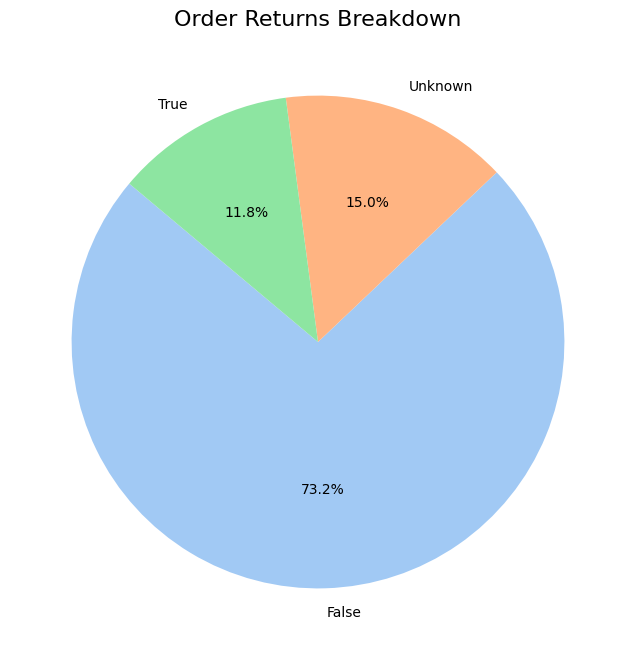

In [50]:
# Pie Chart - Order Returns Breakdown
# Count the breakdown of 'OrderReturn' categories
order_return_counts = df['OrderReturn'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    order_return_counts,
    labels=order_return_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)

# Add title
plt.title('Order Returns Breakdown', fontsize=16)

plt.show()




In [52]:
# Treemap - Product Category Performance
fig = px.treemap(df, path=['Category', 'Product'], values='Price', title='Product Category Performance')
fig.show()

In [54]:
# Funnel Plot - Sales Funnel
funnel_data = df.groupby('Category').agg({'Quantity': 'sum'}).reset_index()
fig = px.funnel(funnel_data, x='Category', y='Quantity', title='Sales Funnel by Category')
fig.show()